In [1]:
# libraries
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd
import joblib
import random
import sys

# mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# sklearn
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# custom libs
path = '/content/drive/Shareddrives/Machine Learning/'
data_path = path + 'data/'
SVM_path = path + 'models/SVM/'

sys.path.append(path + 'preprocessing/')
sys.path.append(path + 'models/')
from load_dataframe import load_dataframe
from confusionMatrix import plot_confusion_matrix

Mounted at /content/drive


In [2]:
# set seeds
np.random.seed(0)
random.seed(0)

#Load Dataset

In [3]:
# load data frame
df = load_dataframe( data_path + 'features.npz', data_path + 'name_class.csv')
display( df.head() )
print("Dataframe shape:", df.shape)

# class encoding
classes = df["class"].unique()
class_code = dict( zip( df["class"].astype('category').cat.categories, np.arange( 0, len( classes) ) ) )
print( "\nClass encoding: ", class_code )

# data split
X = df.drop( columns=["class", "img_name"] )
y = df["class"].copy()

print('\nX shape: ',X.shape)
print('Y shape: ',y.shape)

# normalize (Z-score)
for column in X.columns:
    X[column] = ( X[column] - np.mean( X[column] ) )/np.std( X[column] )

# train and test sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split( X, y, test_size=0.1, random_state=0 )

,0,1,2,3,4,5,6,7,8,9,...,1272,1273,1274,1275,1276,1277,1278,1279,class,img_name
0,1.110234,1.507227,0.000000,0.000000,0.118538,0.000000,0.611660,0.000000,0.216659,0.0,...,0.000000,0.582409,0.0,0.000000,0.000000,0.292292,0.080777,0.342733,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...
1,0.377716,0.804323,0.000000,0.044572,0.469181,0.000000,1.109573,0.000000,0.427474,0.0,...,0.018944,0.851525,0.0,0.239364,0.111541,0.000000,0.363659,0.683264,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...
2,1.291019,0.071864,0.177774,1.815525,0.103777,0.035584,0.019683,0.000000,0.000000,0.0,...,0.000000,0.226819,0.0,0.445593,0.652496,0.022925,0.000000,0.357433,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...
3,0.390894,0.746412,0.039011,0.298714,1.402811,0.000000,0.052603,0.098031,0.058295,0.0,...,0.004990,0.480598,0.0,0.000000,1.700429,0.416542,0.039750,2.452053,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...
4,1.896747,0.958916,0.002194,0.096892,0.260261,0.000000,0.861980,0.043710,0.040442,0.0,...,0.079554,0.058523,0.0,0.100710,0.003879,0.023642,0.020626,0.359759,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...


Dataframe shape: (18748, 1282)

Class encoding:  {'AD': 0, 'CN': 1, 'EMCI': 2, 'LMCI': 3}

X shape:  (18748, 1280)
Y shape:  (18748,)


#Training

In [ ]:
# define number of folds for cross validation
nfolds = 5
kf = KFold( n_splits=nfolds, shuffle=True, random_state=0 )

# kernels to be tested
kernels = ['linear', 'poly', 'poly', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf']
degrees = [       3,      3,      5,     3,     3,     3,     3,     3]
gammas  = [ 'scale','scale','scale',   0.1,   1.0,  10.0,   0.1,   0.1]
Cs      = [     1.0,    1.0,    1.0,   1.0,   1.0,   1.0,    10,   100]

# fit models
results = [ cross_val_score( SVC( kernel=kernel, degree=degree, gamma=gamma, C=C, class_weight='balanced' ),\
                            x_train, y_train, cv=kf ) for kernel, degree, gamma, C in zip(kernels, degrees, gammas, Cs) ]

In [ ]:
results_data = [ (results[i].mean(), results[i].std()) for i in range(len(kernels) )] 
results_df = pd.DataFrame( data = results_data, columns = ["mean", "std"] )
display(results_df)



In [ ]:

# print results
pd.options.display.float_format = "{:,.4f}".format

results_data = [ (results[i].mean(), results[i].std()) for i in range(len(ngs) )] 

results_df = pd.DataFrame( data = results_data, columns = ["mean", "std"] )
results_df.insert( 0, "KNN", ngs )

display( results_df )


In [ ]:
## LINEAR
svmLinear = SVC(kernel='linear', class_weight='balanced')
scoresLinear = cross_val_score(svmLinear, dataTrain, labelTrain, cv=kf)
print('Acurácia com SVM Linear: %0.4f +/- %0.4f' % (scoresLinear.mean(), scoresLinear.std()))

# svmLinear.fit(dataTrain, labelTrain)
# filename = svmPath + 'svmLinear.pkl'
# joblib.dump(svmLinear, open(filename, 'wb'))

## POLY 
# Deg = 3
svmPoly3 = SVC(kernel='poly', degree=3, class_weight='balanced')
scoresPoly3 = cross_val_score(svmPoly3, dataTrain, labelTrain, cv=kf)
print('Acurácia com SVM Poly (Grau 3): %0.4f +/- %0.4f' % (scoresPoly3.mean(), scoresPoly3.std()))

# svmPoly3.fit(dataTrain, labelTrain)
# filename = svmPath + 'svmPoly3.pkl'
# joblib.dump(svmPoly3, open(filename, 'wb'))

# Deg = 5
svmPoly5= SVC(kernel='poly', degree=5, class_weight='balanced')
scoresPoly5 = cross_val_score(svmPoly5, dataTrain, labelTrain, cv=kf)
print('Acurácia com SVM Poly (Grau 5): %0.4f +/- %0.4f' % (scoresPoly5.mean(), scoresPoly5.std()))

# svmPoly5.fit(dataTrain, labelTrain)
# filename = svmPath + 'svmPoly5.pkl'
# joblib.dump(svmPoly5, open(filename, 'wb'))

Acurácia com SVM Linear: 0.3973 +/- 0.0119
Acurácia com SVM Poly (Grau 3): 0.5074 +/- 0.0086
Acurácia com SVM Poly (Grau 5): 0.5725 +/- 0.0076


In [ ]:
svmRBF_01 = SVC(kernel='rbf', gamma=0.1, class_weight='balanced')
scoresRBF_01 = cross_val_score(svmRBF_01, dataTrain, labelTrain, cv=kf)
print('Acurácia com SVM (gamma = 0.1) RBF: %0.4f +/- %0.4f' % (scoresRBF_01.mean(), scoresRBF_01.std()))

# svmRBF1.fit(dataTrain, labelTrain)
# filename = svmPath + 'svmRBF1.pkl'
# joblib.dump(svmRBF1, open(filename, 'wb'))

# gamma = 1
svmRBF_1 = SVC(kernel='rbf', gamma=1, class_weight='balanced')
scoresRBF_1 = cross_val_score(svmRBF_1, dataTrain, labelTrain, cv=kf)
print('Acurácia com SVM (gamma = 1) RBF: %0.4f +/- %0.4f' % (scoresRBF_1.mean(), scoresRBF_1.std()))

# svmRBF10.fit(dataTrain, labelTrain)
# filename = svmPath + 'svmRBF10.pkl'
# joblib.dump(svmRBF10, open(filename, 'wb'))

# gamma = 10
svmRBF_10 = SVC(kernel='rbf', gamma=10, class_weight='balanced')
scoresRBF_10 = cross_val_score(svmRBF_10, dataTrain, labelTrain, cv=kf)
print('Acurácia com SVM (gamma = 10) RBF: %0.4f +/- %0.4f' % (scoresRBF_10.mean(), scoresRBF_10.std()))

In [ ]:
# C = 10
svmRBF10 = SVC(kernel='rbf', gamma=0.1, C=10, class_weight='balanced')
scoresRBF10 = cross_val_score(svmRBF10, dataTrain, labelTrain, cv=kf)
print('Acurácia com SVM (C = 10) RBF: %0.4f +/- %0.4f' % (scoresRBF10.mean(), scoresRBF10.std()))

# svmRBF10.fit(dataTrain, labelTrain)
# filename = svmPath + 'svmRBF10.pkl'
# joblib.dump(svmRBF10, open(filename, 'wb'))

# C = 100
svmRBF100 = SVC(kernel='rbf', gamma=0.1, C=100, class_weight='balanced')
scoresRBF100 = cross_val_score(svmRBF100, dataTrain, labelTrain, cv=kf)
print('Acurácia com SVM (C = 100) RBF: %0.4f +/- %0.4f' % (scoresRBF100.mean(), scoresRBF100.std()))

# svmRBF100.fit(dataTrain, labelTrain)
# filename = svmPath + 'svmRBF100.pkl'
# joblib.dump(svmRBF100, open(filename, 'wb'))

Acurácia com SVM (C = 10) RBF: 0.5304 +/- 0.0115
Acurácia com SVM (C = 100) RBF: 0.5317 +/- 0.0180


In [ ]:
# Escolhido RBF (gamma = 0.1, C = 100)

svm = SVC(kernel='rbf', gamma=0.1, C=100, class_weight='balanced')
svm.fit(dataTrain, labelTrain)
filename = svmPath + 'svm.pkl'
joblib.dump(svm, open(filename, 'wb'))

print("Acurácia com SVM RBF (C = 100): ", sklearn.metrics.accuracy_score(labelTest, svm.predict(dataTest)))

Acurácia com SVM RBF (C = 100):  0.5518707482993197


#Evaluation metrics

In [ ]:
result = svm.score(dataTest, labelTest)
y_pred = svm.predict(dataTest)

Acurácia com SVM (C = 100) RBF: 0.5519


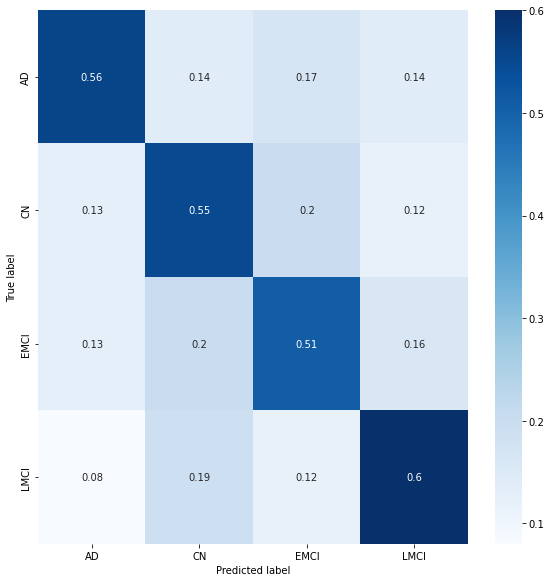

  class            Acurácia       Sensitividade      Especificidade
0    AD  0.8086734693877551  0.5588235294117647  0.8838495575221239
1    CN  0.7525510204081632  0.5521885521885522   0.820250284414107
2  EMCI  0.7423469387755102  0.5059880239520959   0.836104513064133
3  LMCI  0.8001700680272109  0.6007326007326007  0.8604651162790697


In [ ]:
print('Acurácia com SVM (C = 100) RBF: %0.4f' % (result.mean()))
y_pred = pd.DataFrame(y_pred)
y_true = pd.DataFrame(labelTest)

y_pred = y_pred[0].astype('category').cat.codes
y_true = y_true["class"].astype('category').cat.codes

plot_confusion_matrix(y_true, y_pred, list(class_code.keys()))

#Load model

In [ ]:
# Escolhido RBF (gamma = 0.1, C = 100)
filename = svmPath + 'svm.pkl'
svm = joblib.load(open(filename, 'rb'))